In [1]:
#we load the necessary libraries for all the regressions needed (OLS, Poisson, Negative Binomial), and the tests associated
library(tidyverse)
library(car)
library(lmtest)
library(sandwich)    
library(ggplot2)
library(MASS)    
library(AER)     
library(stargazer) 



── Attaching core tidyverse packages ────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
#we load the final data
df <- read.csv("final_df.csv")

In [96]:
summary(df)

 article_url        article_text       article_date_created
 Length:2532        Length:2532        Length:2532         
 Class :character   Class :character   Class :character    
 Mode  :character   Mode  :character   Mode  :character    
                                                           
                                                           
                                                           
                                                           
 article_date_updated cleaned_text        num_comments         year     
 Length:2532          Length:2532        Min.   :  0.00   Min.   :2016  
 Class :character     Class :character   1st Qu.: 16.00   1st Qu.:2018  
 Mode  :character     Mode  :character   Median : 27.00   Median :2019  
                                         Mean   : 31.48   Mean   :2019  
                                         3rd Qu.: 42.00   3rd Qu.:2020  
                                         Max.   :199.00   Max.   :2024  
         

In [102]:
count(df)
length(df)

n
<int>
2532


[1] 17

In [3]:
colnames(df)

[1] "article_url"            "article_text"           "article_date_created"  
 [4] "article_date_updated"   "cleaned_text"           "num_comments"          
 [7] "year"                   "month"                  "negativity"            
[10] "assigned_topic"         "author"                 "article_length"        
[13] "negativity_percent"     "avg_negativity_comment" "max_negativity_comment"
[16] "min_negativity_comment"

In [4]:
table(df$assigned_topic)



             Brexit Political Landscape and Leadership 
                                                   127 
            Brexit Withdrawal Agreements and Protocols 
                                                   835 
Ireland-Northern Ireland Border and Sovereignty Issues 
                                                  1142 
         Trade, Economic Impact, and Business Concerns 
                                                   428 

In [5]:
df$assigned_topic <- as.factor(df$assigned_topic)

#we set the reference level and take the one with the most entries
df$assigned_topic <- relevel(df$assigned_topic, ref = "Ireland-Northern Ireland Border and Sovereignty Issues")


## Ordinary Least Square Regression ##

### First, we run a simple OLS model without authors (less predictors) ###


In [78]:
ols_model_without_authors <- lm(num_comments ~ negativity_percent + year + assigned_topic, data = df)

summary(ols_model_without_authors)



Call:
lm(formula = num_comments ~ negativity_percent + year + assigned_topic, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.713 -13.492  -4.132   9.995 162.582 

Coefficients:
                                                             Estimate
(Intercept)                                                 8398.4096
negativity_percent                                             0.6270
year                                                          -4.1453
assigned_topicBrexit Political Landscape and Leadership       -1.0255
assigned_topicBrexit Withdrawal Agreements and Protocols      -0.2337
assigned_topicTrade, Economic Impact, and Business Concerns   -0.2130
                                                            Std. Error t value
(Intercept)                                                   481.8849  17.428
negativity_percent                                              0.2717   2.308
year                                                            0.238

### Let's test the assumptions of OLS on this regression ###

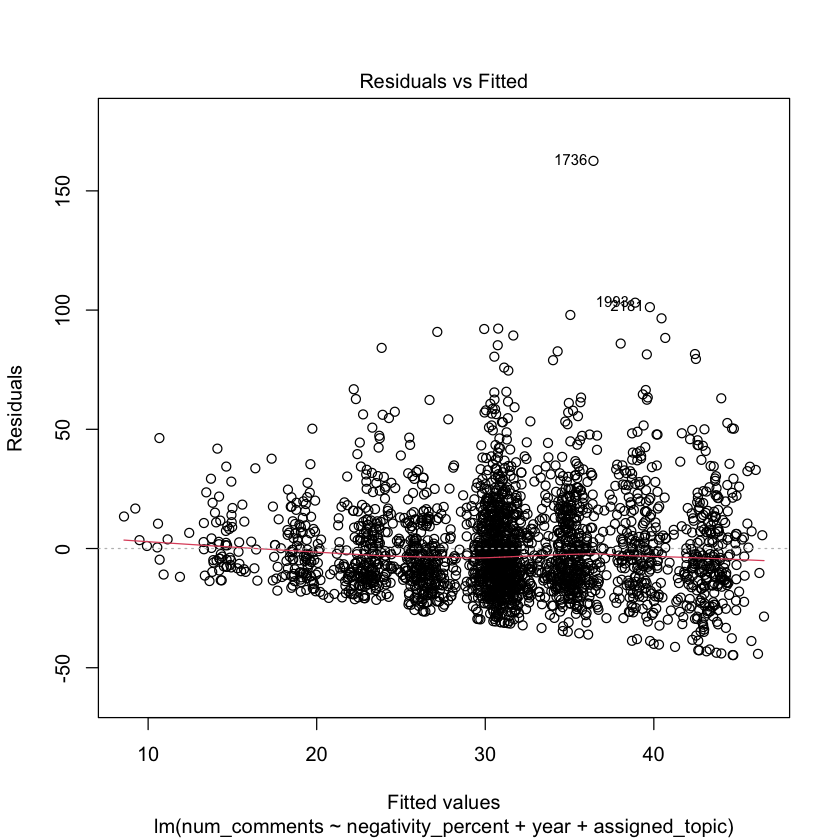

In [79]:
#let's plot the residuals vs fitted values
plot(ols_model_without_authors, which = 1)  
#the red line should be flat and close to the dashed zero line across the entire range of fitted values
#this is potentially violating the linearity assumption

#the spread of the residuals widens considerably and forms a cone shape, indicator of heteroscedasticity
#the assumption of constant variance of errors does not hold for OLS

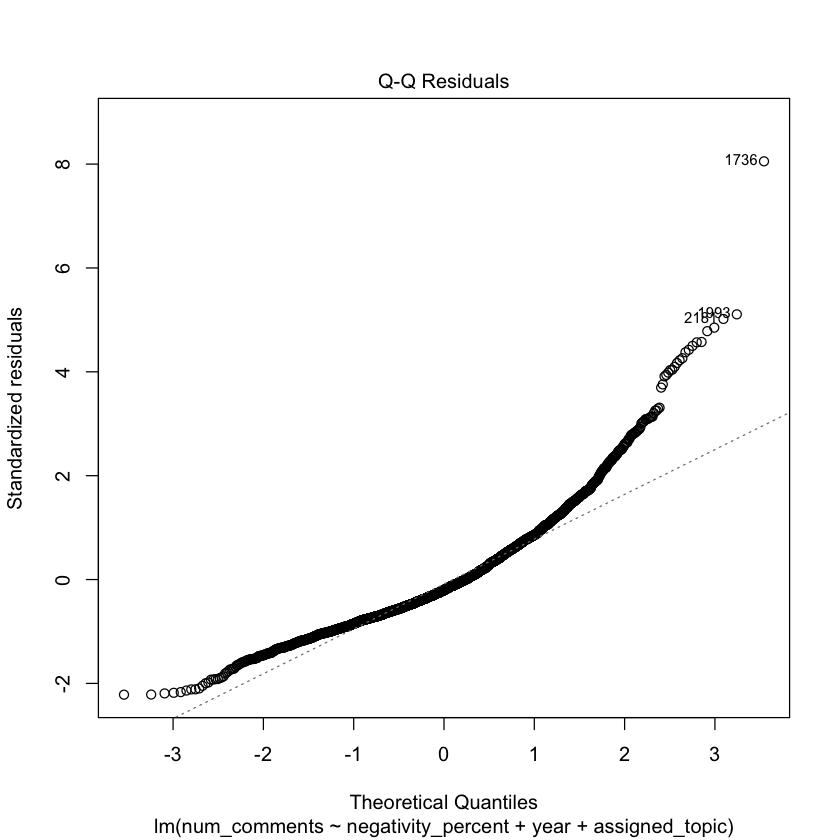

In [80]:
#Q-Q plot to check for normality of errors
plot(ols_model_without_authors, which = 2)  
#the errors are clearly not normally distributed, the assumption of normally distributed errors does not hold for OLS

In [101]:
#run the Durbin-Watson test to see if there is autocorrelation in the residuals 
dwtest(ols_model_without_authors)
#we have a result which is very close to 2, meaning no significant autocorrelation in the residuals
#the assumption of independent errors holds for OLS 


	Durbin-Watson test

data:  ols_model_without_authors
DW = 2.0162, p-value = 0.6521
alternative hypothesis: true autocorrelation is greater than 0


### Now run a simple OLS model with all the independent variables including author ###


In [83]:
ols_model_with_author <- lm(num_comments ~ negativity_percent + year + author + assigned_topic  , data = df)

summary(ols_model_with_author)



Call:
lm(formula = num_comments ~ negativity_percent + year + author + 
    assigned_topic, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.183 -12.388  -3.164   8.930 165.362 

Coefficients:
                                                              Estimate
(Intercept)                                                  7.418e+03
negativity_percent                                           4.468e-01
year                                                        -3.662e+00
authorAaron McKenna                                          2.219e+01
authorAdam Daly                                              5.836e+00
authorAisling O'Rourke                                       9.012e+00
authorAlan Erwin                                            -1.561e+01
authorAlison O'Riordan                                      -1.063e+00
authorAmy Croffey                                           -1.186e+01
authorAndrew Roberts                                        -8.838e+00
author

In [98]:
deviance(ols_model_with_author)
#this is used to compare with other models

[1] 928240.4

### Let's test the assumptions of OLS on this other regression ###

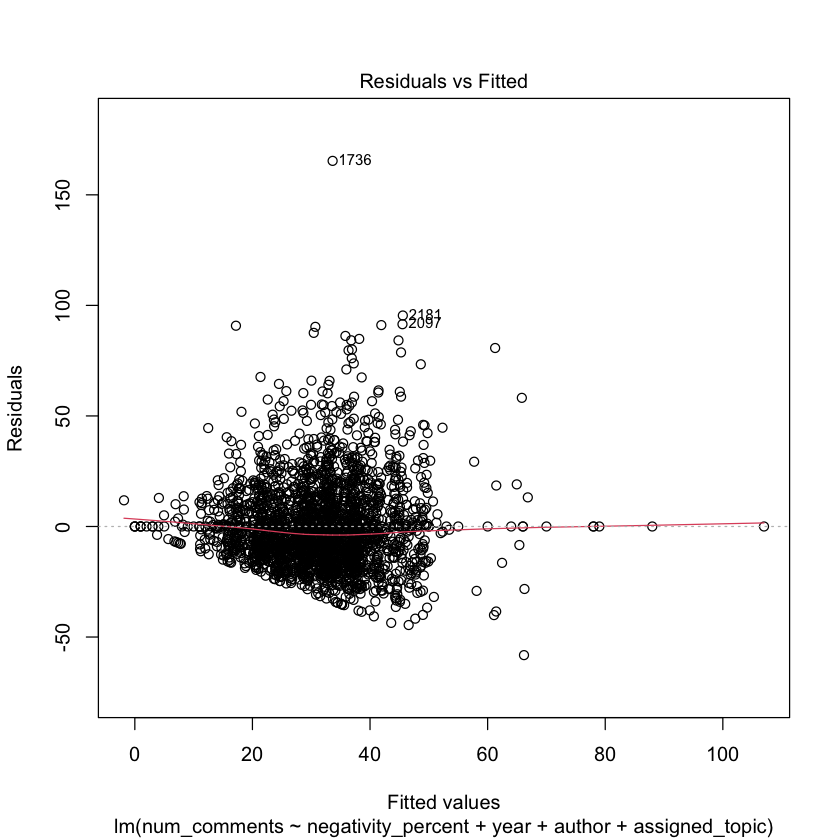

In [84]:
#let's look at the residuals vs fitted values
plot(ols_model_with_author, which = 1)
#we can see we have heteroscedasticity (cone shape again), the assumption of constant variance of errors does not hold for OLS

Warning message:
“not plotting observations with leverage one:
  107, 169, 195, 218, 278, 279, 288, 304, 318, 333, 350, 403, 491, 514, 526, 531, 570, 634, 690, 694, 721, 802, 1135, 1140, 1158, 1277, 1326, 1369, 1486, 1557, 1726, 1727, 1789, 1850, 1926, 1943, 2106, 2134, 2209, 2210, 2211, 2231, 2254, 2267, 2296, 2301, 2312, 2316, 2336, 2348, 2349, 2351, 2352, 2383, 2387, 2389, 2422, 2432, 2433, 2443, 2446, 2450, 2452, 2472, 2484, 2503, 2518, 2530”


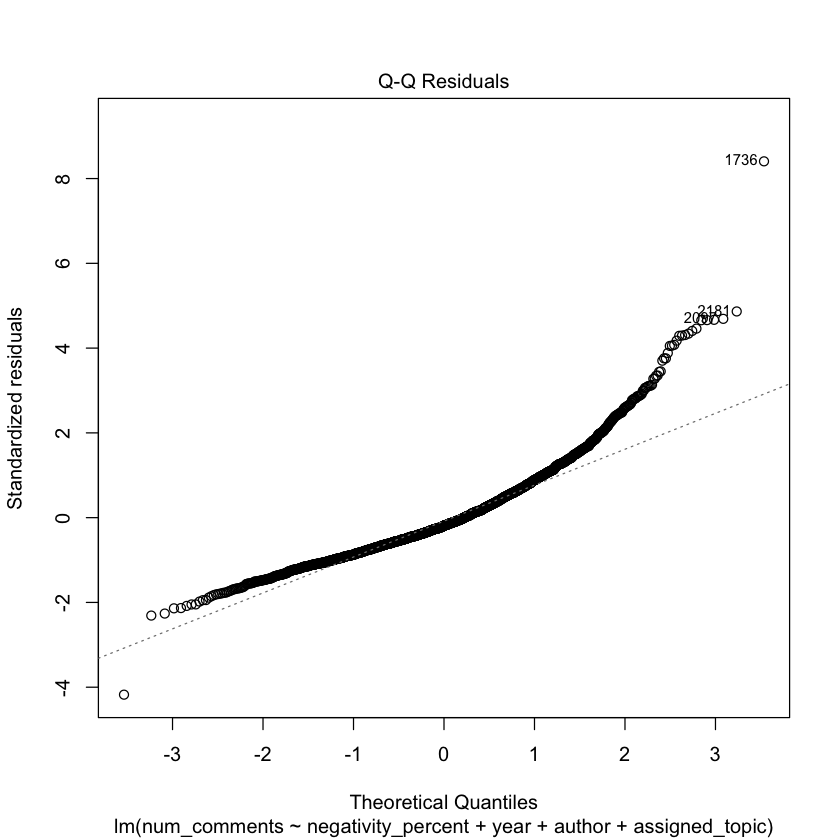

In [85]:
#Q-Q plot to check whether the residuals are normally distributed
plot(ols_model_with_author, which = 2)  
#the residuals are again not normally distributed, the assumption of normally distributed errors does not hold for OLS

In [100]:
#run the Durbin-Watson test to see if there is autocorrelation in the residuals 
dwtest(ols_model_with_author)
#we have a result which is very close to 2, meaning no significant autocorrelation in the residuals
#the assumption of independent errors holds for OLS 


	Durbin-Watson test

data:  ols_model_with_author
DW = 1.9982, p-value = 0.4708
alternative hypothesis: true autocorrelation is greater than 0


In [89]:
#check for multicollinearity
vif(ols_model_with_author)
#No serious multicollinearity concerns in this model predictors


,GVIF,Df,GVIF^(1/(2*Df))
negativity_percent,1.137507,1,1.066540
year,2.199691,1,1.483136
author,2.983749,138,1.003969
assigned_topic,1.205946,3,1.031703


## Poisson Regression ##

### first, we run the regression excluding authors ###

In [67]:
poisson_model_without_authors <- glm(num_comments ~ negativity_percent + year  + assigned_topic,
                     family = poisson(link = "log"), data = df)

summary(poisson_model_without_authors)



Call:
glm(formula = num_comments ~ negativity_percent + year + assigned_topic, 
    family = poisson(link = "log"), data = df)

Coefficients:
                                                              Estimate
(Intercept)                                                 277.279719
negativity_percent                                            0.017342
year                                                         -0.135673
assigned_topicBrexit Political Landscape and Leadership      -0.034256
assigned_topicBrexit Withdrawal Agreements and Protocols     -0.006733
assigned_topicTrade, Economic Impact, and Business Concerns  -0.005593
                                                            Std. Error z value
(Intercept)                                                   4.386340  63.214
negativity_percent                                            0.002361   7.345
year                                                          0.002173 -62.428
assigned_topicBrexit Political Landscape and

### Then, including authors ###


In [68]:
poisson_model_authors <- glm(num_comments ~ negativity_percent + year + author + assigned_topic,
                     family = poisson(link = "log"), data = df)

summary(poisson_model_authors)


Call:
glm(formula = num_comments ~ negativity_percent + year + author + 
    assigned_topic, family = poisson(link = "log"), data = df)

Coefficients:
                                                              Estimate
(Intercept)                                                 242.738143
negativity_percent                                            0.013025
year                                                         -0.118624
authorAaron McKenna                                           0.454113
authorAdam Daly                                               0.196189
authorAisling O'Rourke                                        0.274901
authorAlan Erwin                                             -0.797149
authorAlison O'Riordan                                       -0.037431
authorAmy Croffey                                            -0.544500
authorAndrew Roberts                                         -0.407865
authorAodhan O'Faolain & Ray Managh                         -14.584

In [70]:
#we compare between the two
AIC(poisson_model_without_authors, poisson_model_authors)
#the model with authors is better

,df,AIC
,<dbl>,<dbl>
poisson_model_without_authors,6,43112.77
poisson_model_authors,144,39963.45


In [34]:
#we run a dispersion test on the best model so far: with the authors
dispersiontest(poisson_model_authors)
#since p < 0.05, overdispersion is present → Poisson is not appropriate



	Overdispersion test

data:  poisson_model_authors
z = 18.447, p-value < 2.2e-16
alternative hypothesis: true dispersion is greater than 1
sample estimates:
dispersion 
  11.35095 


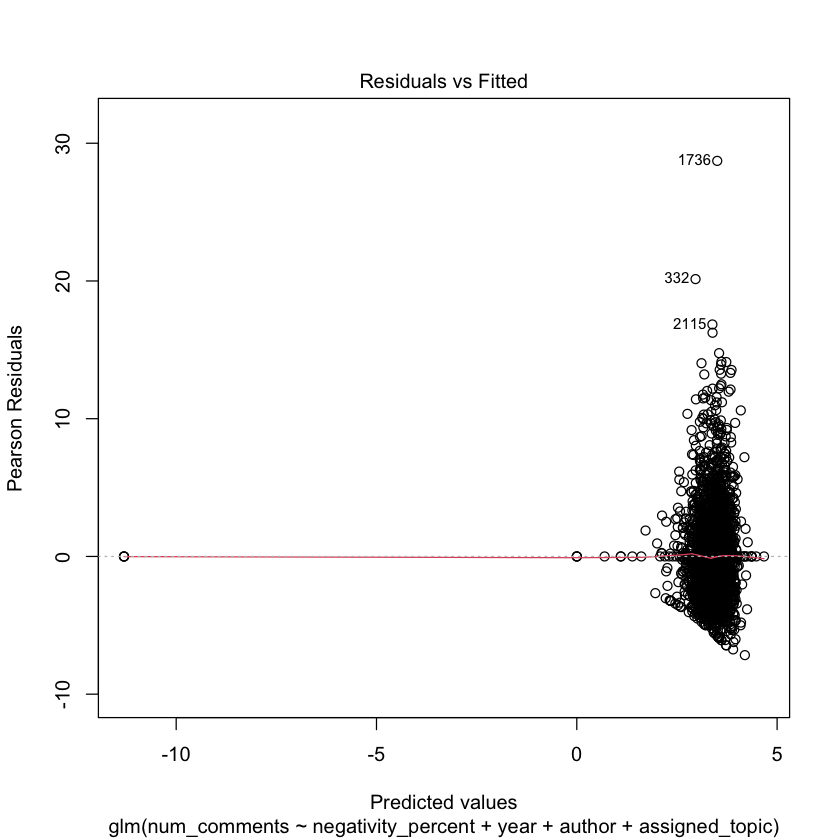

In [65]:
## we also look at the residuals for Poisson regression

plot(poisson_model_authors, which = 1)  
#we have clear overdispersion (the Pearson residuals are fanning out), and some outliers (2115, 332, 1736) poorly explained by the model
#

# Negative Binomial #

In [127]:
#since overdispersion exists, a negative binomial model is a better fit

#without authors (with the main independent variables)
nb_model_without_authors <- glm.nb(
  num_comments ~ negativity_percent + year + assigned_topic ,
  data = df
)
stargazer(nb_model_without_authors, type = "text", title = "Negative Binomial Regression (without authors)", single.row = TRUE)



Negative Binomial Regression (without authors)
                                                                Dependent variable:    
                                                            ---------------------------
                                                                   num_comments        
---------------------------------------------------------------------------------------
negativity_percent                                                0.019** (0.009)      
year                                                             -0.140*** (0.008)     
assigned_topicBrexit Political Landscape and Leadership           -0.024 (0.061)       
assigned_topicBrexit Withdrawal Agreements and Protocols          0.0005 (0.030)       
assigned_topicTrade, Economic Impact, and Business Concerns       -0.010 (0.037)       
Constant                                                        285.177*** (15.691)    
------------------------------------------------------------------------

In [124]:
#we need to obtain the p-values as well
coefs <- summary(nb_model_without_authors)$coefficients
p_vals <- coefs[, 4]
p_vals

(Intercept) 
                                               8.189782e-74 
                                         negativity_percent 
                                               2.971876e-02 
                                                       year 
                                               4.204726e-72 
    assigned_topicBrexit Political Landscape and Leadership 
                                               6.978459e-01 
   assigned_topicBrexit Withdrawal Agreements and Protocols 
                                               9.871812e-01 
assigned_topicTrade, Economic Impact, and Business Concerns 
                                               7.909169e-01

In [116]:
#with authors
nb_model_with_authors <- glm.nb(
  num_comments ~ negativity_percent + year + author + assigned_topic ,
  data = df
)
stargazer(nb_model_with_authors, type = "text", title = "Negative Binomial Regression (with authors)", single.row = TRUE)



Negative Binomial Regression (with authors)
                                                                Dependent variable:    
                                                            ---------------------------
                                                                   num_comments        
---------------------------------------------------------------------------------------
negativity_percent                                                 0.014 (0.009)       
year                                                             -0.121*** (0.011)     
authorAaron McKenna                                                0.430 (0.607)       
authorAdam Daly                                                   0.205* (0.110)       
authorAisling O'Rourke                                             0.271 (0.354)       
authorAlan Erwin                                                  -0.794* (0.464)      
authorAlison O'Riordan                                            -0.035 (0

In [126]:
#we need to obtain the p-values as well
coefs <- summary(nb_model_with_authors)$coefficients
p_vals <- coefs[, 4]
p_vals

(Intercept) 
                                               8.309847e-30 
                                         negativity_percent 
                                               1.061143e-01 
                                                       year 
                                               4.858415e-29 
                                        authorAaron McKenna 
                                               4.791361e-01 
                                            authorAdam Daly 
                                               6.241564e-02 
                                     authorAisling O'Rourke 
                                               4.448253e-01 
                                           authorAlan Erwin 
                                               8.707542e-02 
                                     authorAlison O'Riordan 
                                               9.541493e-01 
                                          authorAmy Croffey 
                                               3.995789e-01 
                                       authorAndrew Roberts 
                                               3.649781e-01 
                        authorAodhan O'Faolain & Ray Managh 
                                               9.980882e-01 
                                          authorAoife Barry 
                                               9.757119e-02 
                             authorAssociated Foreign Press 
                                               7.043055e-02 
                                        authorBarry Andrews 
                                               1.887890e-02 
                                         authorBarry Whelan 
                                               2.923130e-01 
                                            authorBen Blake 
                                               1.142182e-01 
                                       authorBobby McDonagh 
                                               2.390196e-01 
                                          authorBrian Rowan 
                                               4.372216e-01 
                                         authorBrian Whelan 
                                               9.630356e-03 
                                     authorBusiness Insider 
                                               4.296879e-01 
                                          authorCJ McKinney 
                                               3.111336e-01 
              authorCaitriona O'Neill and William Gallagher 
                                               9.036311e-01 
                                    authorCaoimhín De Barra 
                                               3.464428e-01 
                                        authorCarl Kinsella 
                                               6.174731e-01 
                                      authorCatherine Healy 
                                               8.133507e-01 
                                       authorChristina Finn 
                                               9.442733e-03 
                                      authorChristine Bohan 
                                               1.809437e-01 
                                       authorCianan Brennan 
                                               1.249098e-02 
                                     authorCiaran McCullagh 
                                               7.286900e-01 
                                     authorCliodhna Russell 
                                               1.525997e-03 
                                        authorConor McCrave 
                                               3.563963e-01 
                                    authorCormac Fitzgerald 
                                               2.265112e-03 
                                         authorCormac Moore 
                                               9.386534e-01 
                      

In [69]:
#we can compare the two models
AIC(nb_model_without_authors, nb_model_with_authors)
#with authors is a slightly better fit (but the improvement is marginal)

,df,AIC
,<dbl>,<dbl>
nb_model_without_authors,7,21682.88
nb_model_with_authors,145,21626.68


In [91]:
#finally, we compare the three models using the AIC
AIC(ols_model_with_author, poisson_model_authors, nb_model_with_authors)
#the negative binomial is the best model out of the three

,df,AIC
,<dbl>,<dbl>
ols_model_with_author,145,22425.14
poisson_model_authors,144,39963.45
nb_model_with_authors,145,21626.68


## Now looking at interactions for topic and time ##

In [118]:
#with interactions for tone x topic
nb_model_interaction_topic <- glm.nb(
  num_comments ~ negativity_percent * assigned_topic + year,
  data = df
)
stargazer(nb_model_interaction_topic, type = "text", title = "Negative Binomial Regression (interaction with topic)", single.row = TRUE)




Negative Binomial Regression (interaction with topic)
                                                                                   Dependent variable:    
                                                                               ---------------------------
                                                                                      num_comments        
----------------------------------------------------------------------------------------------------------
negativity_percent                                                                    0.015 (0.013)       
assigned_topicBrexit Political Landscape and Leadership                              -0.069 (0.150)       
assigned_topicBrexit Withdrawal Agreements and Protocols                              0.012 (0.073)       
assigned_topicTrade, Economic Impact, and Business Concerns                          -0.095 (0.089)       
year                                                                                -0.13

In [122]:
#we need to obtain the p-values as well
coefs <- summary(nb_model_interaction_topic)$coefficients
p_vals <- coefs[, 4]
p_vals

(Intercept) 
                                                                  1.873370e-73 
                                                            negativity_percent 
                                                                  2.414149e-01 
                       assigned_topicBrexit Political Landscape and Leadership 
                                                                  6.430634e-01 
                      assigned_topicBrexit Withdrawal Agreements and Protocols 
                                                                  8.648014e-01 
                   assigned_topicTrade, Economic Impact, and Business Concerns 
                                                                  2.849392e-01 
                                                                          year 
                                                                  9.515194e-72 
    negativity_percent:assigned_topicBrexit Political Landscape and Leadership 
                                                                  7.391413e-01 
   negativity_percent:assigned_topicBrexit Withdrawal Agreements and Protocols 
                                                                  8.564418e-01 
negativity_percent:assigned_topicTrade, Economic Impact, and Business Concerns 
                                                                  2.926992e-01

In [120]:
#with interactions for tone x year
nb_model_interaction_year <- glm.nb(
  num_comments ~ negativity_percent * year + assigned_topic,
  data = df
)
stargazer(nb_model_interaction_year, type = "text", title = "Negative Binomial Regression (interaction with year)", single.row = TRUE)



Negative Binomial Regression (interaction with year)
                                                                Dependent variable:    
                                                            ---------------------------
                                                                   num_comments        
---------------------------------------------------------------------------------------
negativity_percent                                                -6.937 (10.385)      
year                                                             -0.152*** (0.020)     
assigned_topicBrexit Political Landscape and Leadership           -0.024 (0.061)       
assigned_topicBrexit Withdrawal Agreements and Protocols          0.0004 (0.030)       
assigned_topicTrade, Economic Impact, and Business Concerns       -0.009 (0.037)       
negativity_percent:year                                            0.003 (0.005)       
Constant                                                        30

In [123]:
#we need to obtain the p-values as well
coefs <- summary(nb_model_interaction_year)$coefficients
p_vals <- coefs[, 4]
p_vals

(Intercept) 
                                               6.849246e-15 
                                         negativity_percent 
                                               5.041506e-01 
                                                       year 
                                               1.338465e-14 
    assigned_topicBrexit Political Landscape and Leadership 
                                               6.951334e-01 
   assigned_topicBrexit Withdrawal Agreements and Protocols 
                                               9.896919e-01 
assigned_topicTrade, Economic Impact, and Business Concerns 
                                               8.024115e-01 
                                    negativity_percent:year 
                                               5.029749e-01

## Diagnostic cheks/goodness-of -fit ##

In [25]:
#we create a null model to see if we have any improvements with our full model
nb_null <- glm.nb(num_comments ~ 1, data = df)

In [105]:
#we compare the log likelihoods of the null and full model
ll_full <- logLik(nb_model_with_authors)
ll_full
ll_null <- logLik(nb_null)
ll_null

#then, we compare the likelihood Ratio Chi-Square statistic:
LR_stat <- 2 * (as.numeric(ll_full) - as.numeric(ll_null))
LR_stat

#and the p-value
p_value <- pchisq(LR_stat, df = df_diff, lower.tail = FALSE)
p_value

'log Lik.' -10668.34 (df=145)

'log Lik.' -10981.48 (df=2)

[1] 626.2744

[1] 1.154863e-61

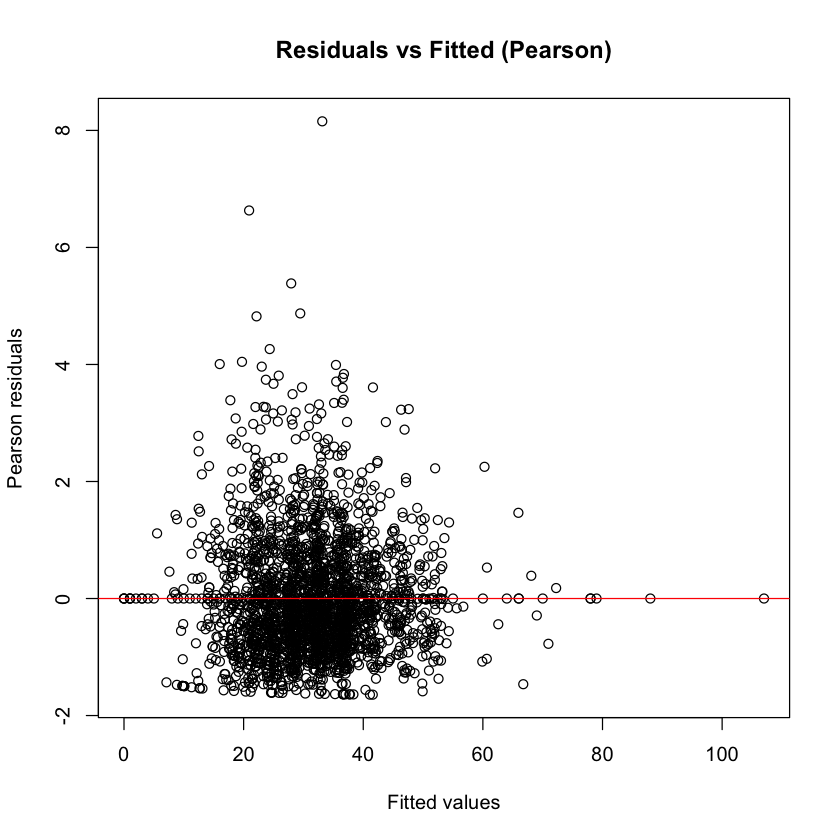

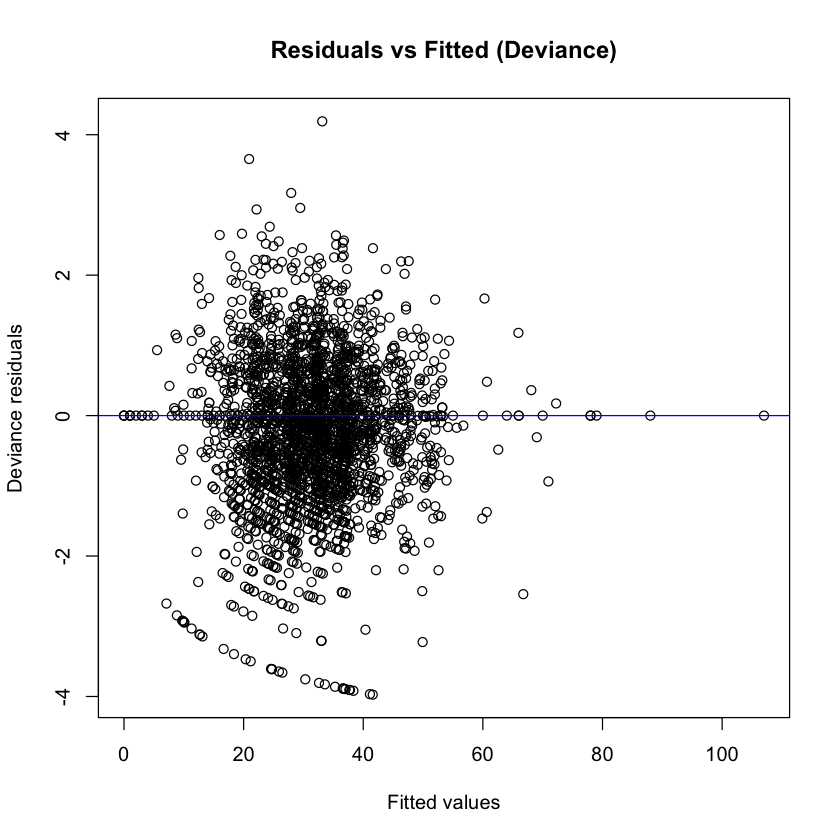

In [27]:
#we also check for the residuals by plotting them (both Pearson and Deviance residuals)
pearson_resid <- residuals(nb_model_with_authors, type = "pearson")
deviance_resid <- residuals(nb_model_with_authors, type = "deviance")
fitted_vals <- fitted(nb_model_with_authors)

#we plot the Pearson residuals plot first
plot(fitted_vals, pearson_resid,
     xlab = "Fitted values", ylab = "Pearson residuals",
     main = "Residuals vs Fitted (Pearson)")
abline(h = 0, col = "red")

#then the Deviance residuals plot
plot(fitted_vals, deviance_resid,
     xlab = "Fitted values", ylab = "Deviance residuals",
     main = "Residuals vs Fitted (Deviance)")
abline(h = 0, col = "blue")



In [28]:
#we do the overdispersion test manually on the negative binomial
resid_df <- df.residual(nb_model_with_authors)
dispersion <- sum(pearson_resid^2) / resid_df
dispersion

[1] 1.056101

## Does the tone of the article relate to the tone of the comment? ##

In [52]:
#first, we look at the correlation between the average negativity in the comments and the average negativity of the article 
model_avg <- lm(avg_negativity_comment ~ negativity_percent, data = df)
summary(model_avg)


Call:
lm(formula = avg_negativity_comment ~ negativity_percent, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-5.625 -1.242 -0.258  0.844 38.386 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.08679    0.10809  37.808  < 2e-16 ***
negativity_percent  0.18992    0.03011   6.308 3.34e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.22 on 2493 degrees of freedom
  (37 observations deleted due to missingness)
Multiple R-squared:  0.01571,	Adjusted R-squared:  0.01532 
F-statistic: 39.79 on 1 and 2493 DF,  p-value: 3.335e-10


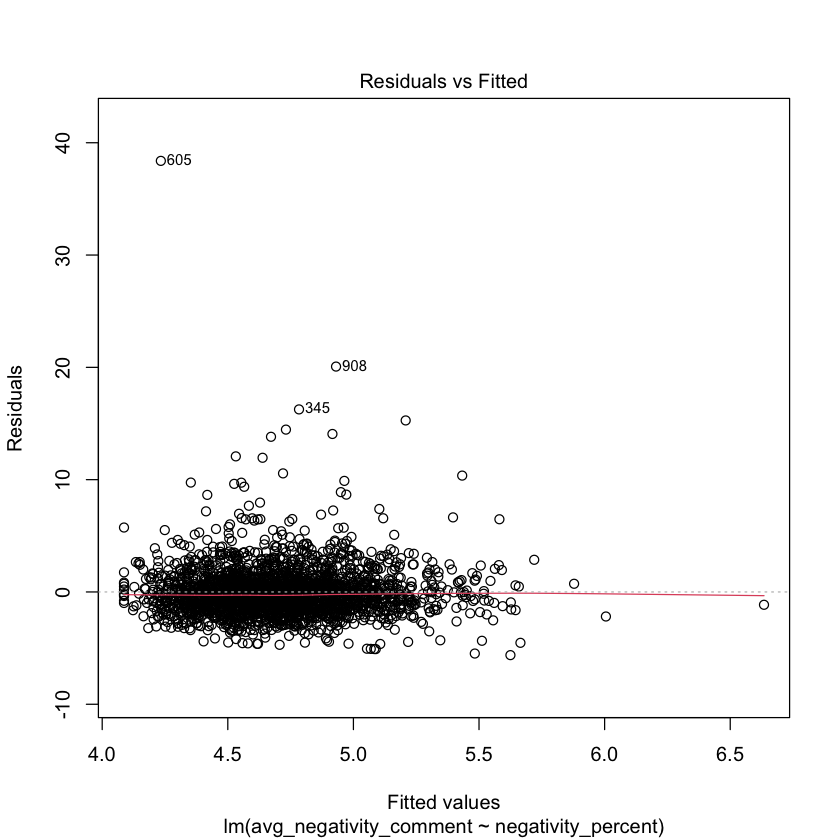

In [106]:
#since we are using linear regression, we need to test the assumptions
#first we look at the residuals vs fitted values 4
plot(model_avg, which = 1)  
#it seems that we have some heteroscedacity as well (violating the assumption), and probably some outliers

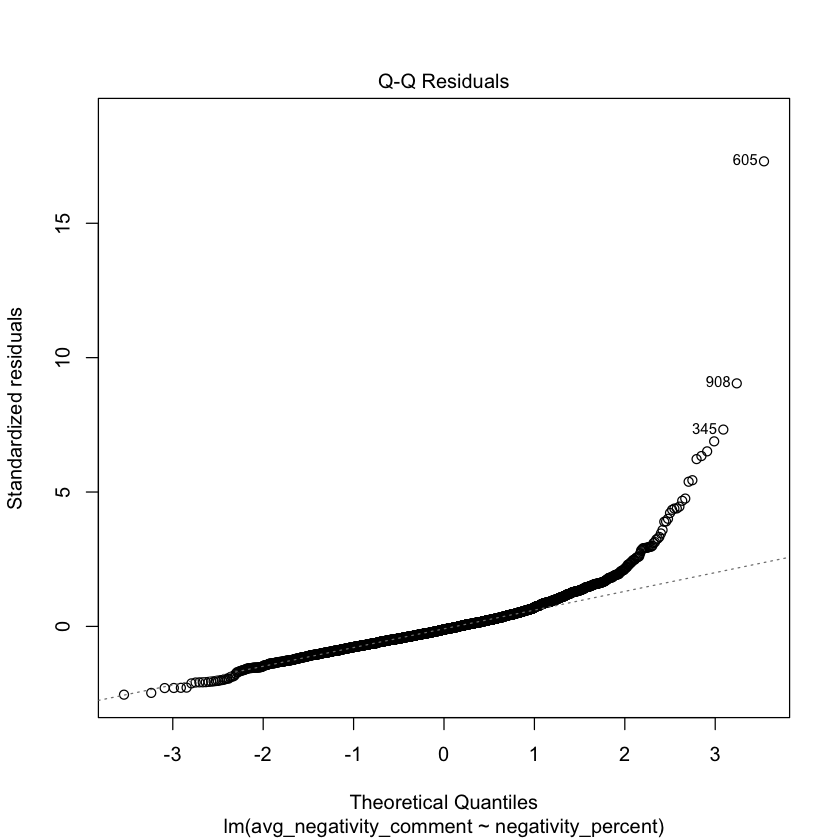

In [55]:
#then the Q-Q plot
plot(model_avg, which = 2)  
#we can see that the errors are not normally distributed, which violates the assumption of normally distributed errors in OLS
#we can also see some potential outliers 

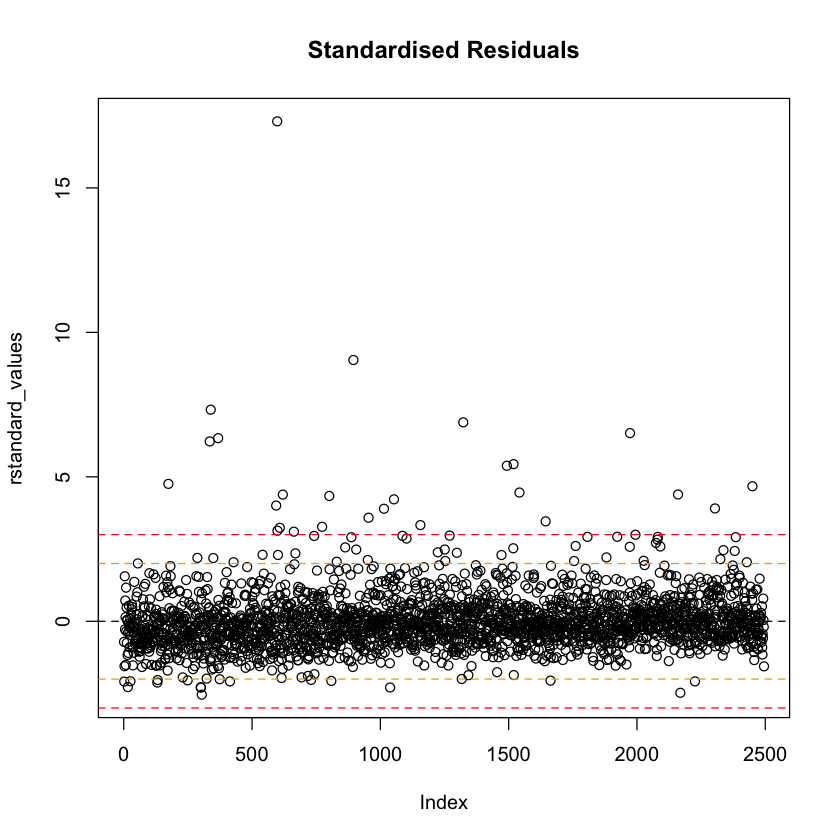

In [111]:
#it looks like we have some outliers
#so we can check this 
rstandard_values <- rstandard(model_avg)

plot(rstandard_values, main = "Standardised Residuals")
abline(h = c(-3, -2, 0, 2, 3), col = c("red", "orange", "black", "orange", "red"), lty = 2)


In [ ]:
#clearly we have some outliers, but this seems normal conisidering some people will be extremely negative in their comments
#that's a behaviour we want to capture too, so we cannot forget about those outliers 

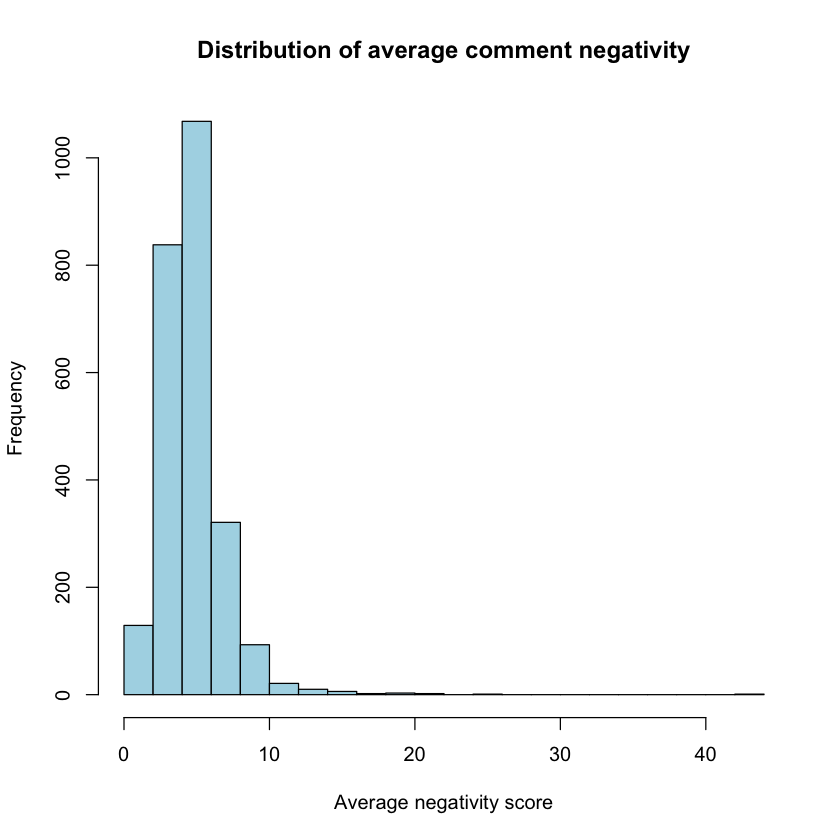

In [110]:
#let's look at the distribution of the the average comment negativity to see what we can do about it
hist(df$avg_negativity_comment,
     main = "Distribution of average comment negativity",
     xlab = "Average negativity score",
     col = "lightblue",
     breaks = 30)


In [46]:
#we can see that the data is very much right skewed 

#we can try and log-transforming it to make the data less skewed
df$log_avg_negativity_comment <- log(df$avg_negativity_comment + 1)



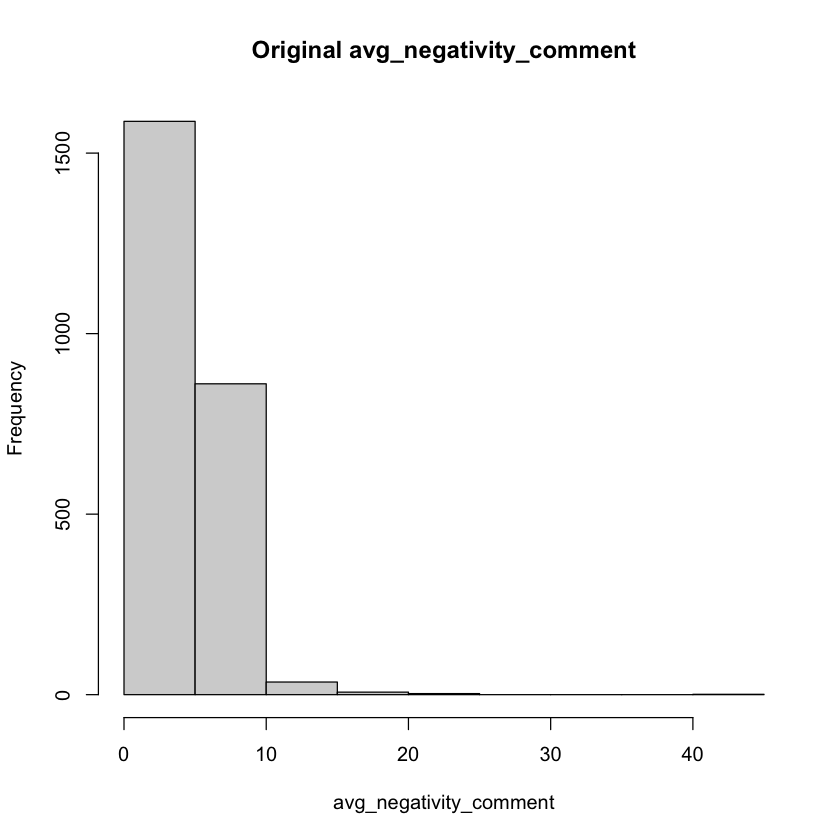

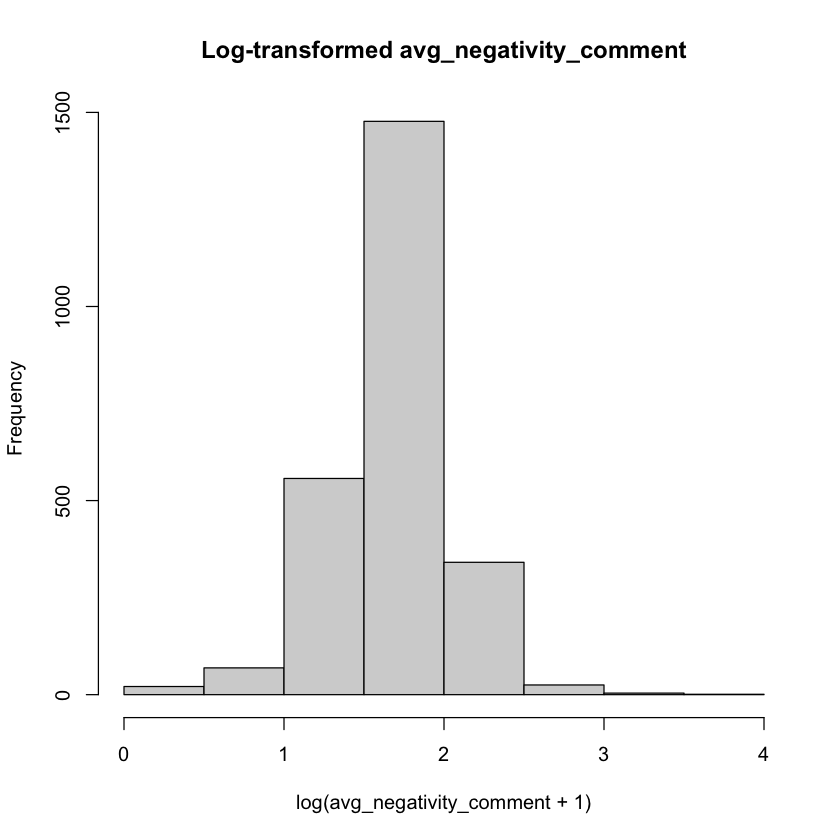

In [47]:
#we can compare the distribution using histograms
#the original distribution
hist(df$avg_negativity_comment, main = "Original avg_negativity_comment", xlab = "avg_negativity_comment")

#the log-transformed distribution
hist(df$log_avg_negativity_comment, main = "Log-transformed avg_negativity_comment", xlab = "log(avg_negativity_comment + 1)")


In [ ]:
#it seems much better for an OLS with the log-transformation

In [125]:
#we fit the linear model with the transformed dependent variable
model_log <- lm(log_avg_negativity_comment ~ negativity_percent, data = df)

stargazer(model_log, type = "text", title = "Negative Binomial Regression (article tone and comment tone)", single.row = TRUE)



Negative Binomial Regression (article tone and comment tone)
                        Dependent variable:    
                    ---------------------------
                    log_avg_negativity_comment 
-----------------------------------------------
negativity_percent       0.034*** (0.005)      
Constant                 1.566*** (0.018)      
-----------------------------------------------
Observations                   2,495           
R2                             0.019           
Adjusted R2                    0.018           
Residual Std. Error      0.362 (df = 2493)     
F Statistic          47.578*** (df = 1; 2493)  
Note:               *p<0.1; **p<0.05; ***p<0.01


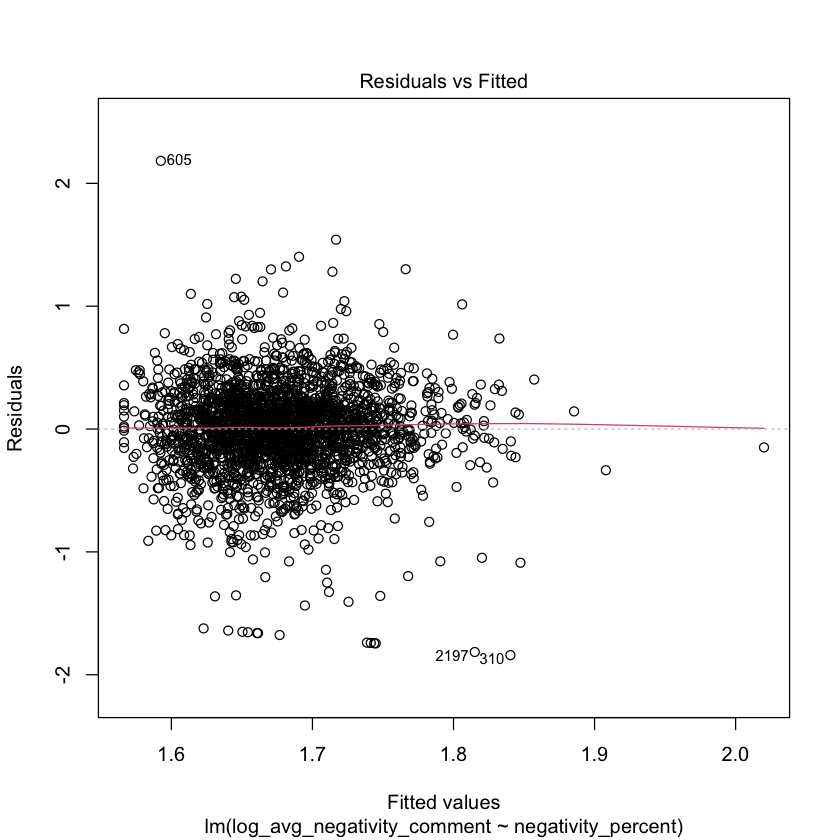

In [50]:
#now we test again the assumptions

#plot of the residuals vs fitted values
plot(model_log, which = 1) 
#this seems much better, no clear violations of the assumptions

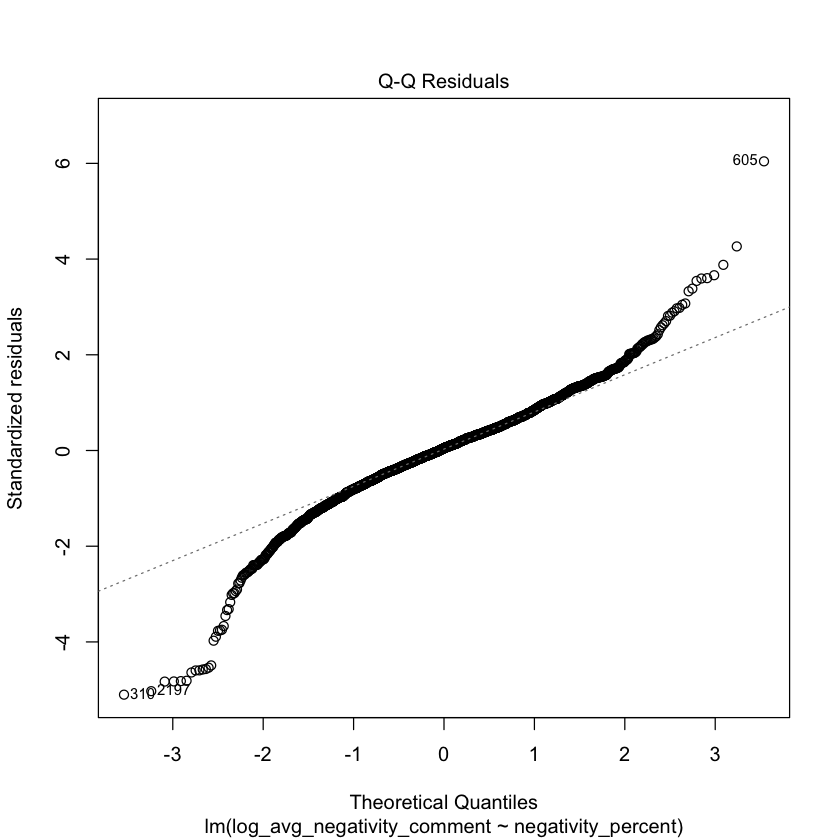

In [107]:
#the Q-Q plot
plot(model_log, which = 2)  
#overall distribution is still not perfectly normal, we still have some outliers 

In [ ]:
#but we have overall much more reliable results 